In [61]:
# The code is loosely based on the example in
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
#
# Copyright © 2019 Ehsan Khatami
# Modified with Permission by Robin Newby (2023)
import numpy as np

import tensorflow as tf
import tensorflow.python.keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [63]:
# Loading Data from File
data_high=np.loadtxt("Theory_TrainingSet_High.dat")
data_low=np.loadtxt("Theory_TrainingSet_Low.dat")

data_high=data_high[:,4:]
data_low=data_low[:,4:]

data_high=data_high.reshape(10000,10,10,1)
data_low=data_low.reshape(10000,10,10,1)

#setting up the labels
labels_high=np.zeros((10000,2))
labels_low=np.zeros((10000,2))

labels_high[:,1]=np.ones((10000))
labels_low[:,0]=np.ones((10000))

labels=np.concatenate((labels_high,labels_low))

data=np.concatenate((data_high,data_low))
labels=np.concatenate((labels_high,labels_low))



In [110]:

#shuffle the data and labels in the same way
indx=np.arange(20000)
np.random.shuffle(indx)
data=data[indx]
labels=labels[indx]

#create validation data
N  = 20000
X_train = data[:N*8//10,:]
X_test = data[N*8//10:,:]
Y_train = labels[:N*8//10,:]
Y_test = labels[N*8//10:,:]



[0. 1.]


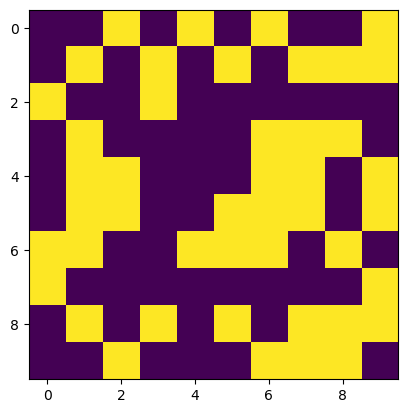

In [65]:
# Preview the data
import matplotlib.pyplot as plt

testSlice=10786
plt.imshow(data[testSlice])
print(labels[testSlice])

In [66]:
# Building the neural network
from keras.layers import Conv2D
from keras.layers import Flatten

from keras import activations
model = Sequential()
model.add(Conv2D(filters=3,kernel_size=(3,3),input_shape=(10,10,1),activation=activations.relu))
model.add(Flatten())
model.add(Dense(10, activation=activations.relu))
model.add(Dense(N_out, activation='softmax'))

In [67]:
# Specifying the loss function, the optimizer and how we want to measure the success
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [68]:
# Training the network using the fit option
history = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=100, batch_size=100)

Epoch 1/100
160/160 [==============================] - 2s 8ms/step - loss: 0.6771 - categorical_accuracy: 0.5776 - val_loss: 0.6409 - val_categorical_accuracy: 0.6305
Epoch 2/100
160/160 [==============================] - 1s 5ms/step - loss: 0.6041 - categorical_accuracy: 0.6773 - val_loss: 0.5781 - val_categorical_accuracy: 0.6980
Epoch 3/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5556 - categorical_accuracy: 0.7149 - val_loss: 0.5397 - val_categorical_accuracy: 0.7245
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5215 - categorical_accuracy: 0.7431 - val_loss: 0.5127 - val_categorical_accuracy: 0.7473
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4921 - categorical_accuracy: 0.7659 - val_loss: 0.4904 - val_categorical_accuracy: 0.7605
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4657 - categorical_accuracy: 0.7810 - val_loss: 0.4709 - val_categorical_accuracy: 0.779

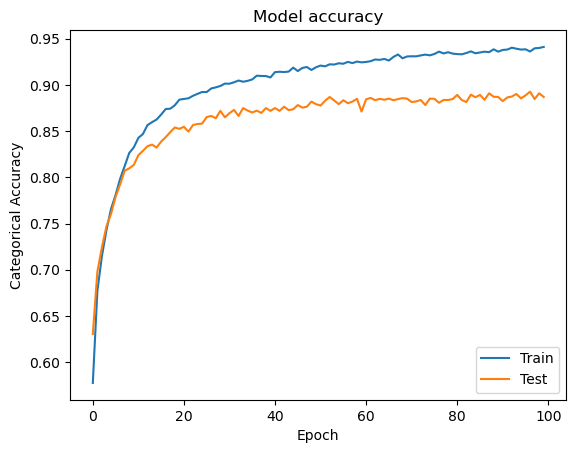

In [72]:
#View the training process
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

Unsurprisingly, the testing data is not classified as well as the training data.

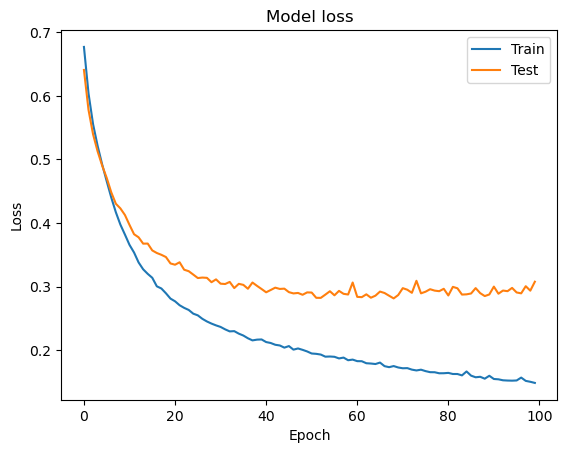

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

The loss shows this as well.

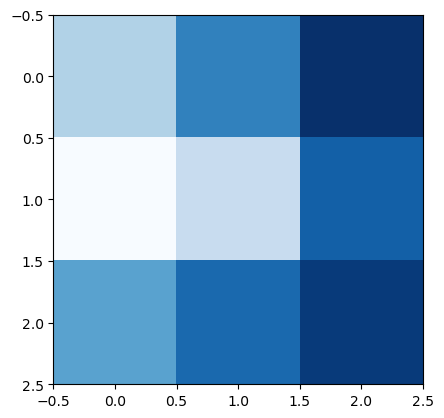

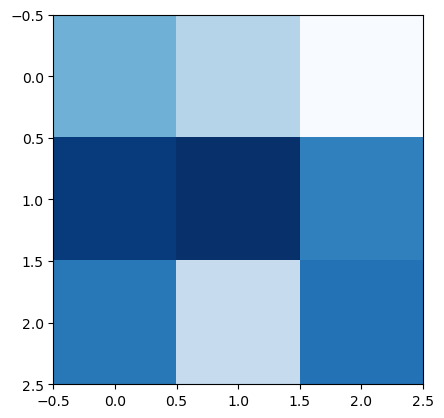

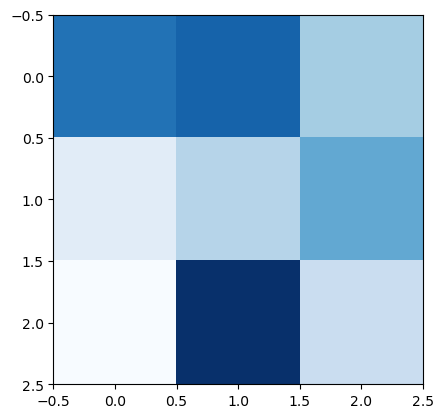

In [109]:
plt.imshow(model.get_weights()[0][:,:,0,0],cmap='Blues')
plt.figure()
plt.imshow(model.get_weights()[0][:,:,0,1],cmap='Blues')
plt.figure()
plt.imshow(model.get_weights()[0][:,:,0,2],cmap='Blues')


Our convolutional filters sure do look like something. The three different filters are definitely doing a good job categorizing the data, but I can't tell exactly what each filter is capturing.

A guess: The first filter is looking for the structure of the low temperature data, as the last column is all high value, with the second filter doing the same but for the middle row. The last filter might be looking for the chaos in the high temperature sets.

In [99]:
model.get_weights()[0]

array([[[[-0.63508874,  0.30768907,  0.3239448 ]],

        [[-0.08328113,  0.03301844,  0.40126258]],

        [[ 0.38790286, -0.4114492 , -0.1961115 ]]],


       [[[-1.1067871 ,  0.9882969 , -0.51789826]],

        [[-0.74999636,  1.0538839 , -0.26823205]],

        [[ 0.110776  ,  0.5978616 ,  0.03133007]]],


       [[[-0.2816837 ,  0.6429252 , -0.6635999 ]],

        [[ 0.05969388, -0.05142788,  0.6617055 ]],

        [[ 0.32599425,  0.6764106 , -0.3602552 ]]]], dtype=float32)

In [100]:

X=np.loadtxt('Expt_TestSet_2.dat')
X[X==-1]=0
X=X.reshape(765,12,12)
X_crop=X[:,1:-1,1:-1]

y_pred = model.predict(X_crop)


We didn't get to the part where we check against this extra data, but we started it. Anyway, the validation score is pretty good.